Computational Magnetic Resonance Imaging (CMRI) 2023/2024 Winter semester

- Author          : Jinho Kim
- Email           : <jinho.kim@fau.de>
- Last update     : Oct. 06. 2023

# Lab01: MRI pulse sequences and image contrast

## Import modules

In [15]:
import numpy as np
import utils

## 1. Instpect the digital brain phantom (Aubert-Broche, Neuroimage 2006)
### 1.1 Load the file digital_brain_phantom.mat
- Label (mat['ph']['label'][0][0]) 
  - 1: Cerebrospinal Fluid (CSF)
  - 2: Gray Matter (GM)
  - 3: White Matter (WM)
- T1_map (mat['ph']['t1'][0][0])
  - Predefined T1 values
- T2_map (mat['ph']['t2'][0][0])
  - Predefined T2 values
- PD_map (mat['ph']['sd'][0][0])
  - Predefined proton density(PD) values

In [16]:
mat = utils.load_data("digital_brain_phantom.mat")
label = mat['ph']['label'][0][0]
T1_map = mat['ph']['t1'][0][0]
T2_map = mat['ph']['t2'][0][0]
PD_map = mat['ph']['sd'][0][0]

### 1.2 Display the regions CSF, GM, and WM

Define CSF, GM, and WM

Display CSF, GM, and WM

In [17]:
# Your code here ... 
CSF = (label == 1)
GM = (label == 2)
WM = (label == 3)


### 1.3 Display the predefined T1, T2, and PD values for these three regions

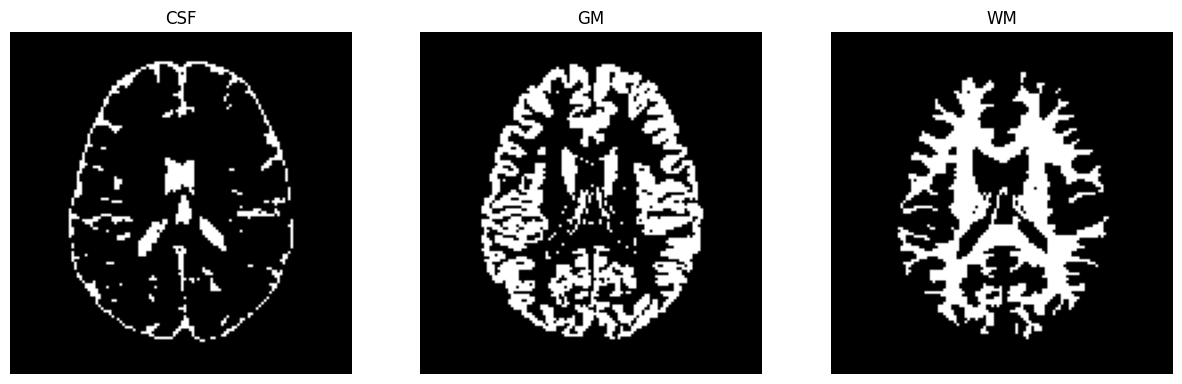

In [18]:
# Your code here ... 
utils.imshow([CSF, GM, WM], titles=['CSF', 'GM', 'WM'])


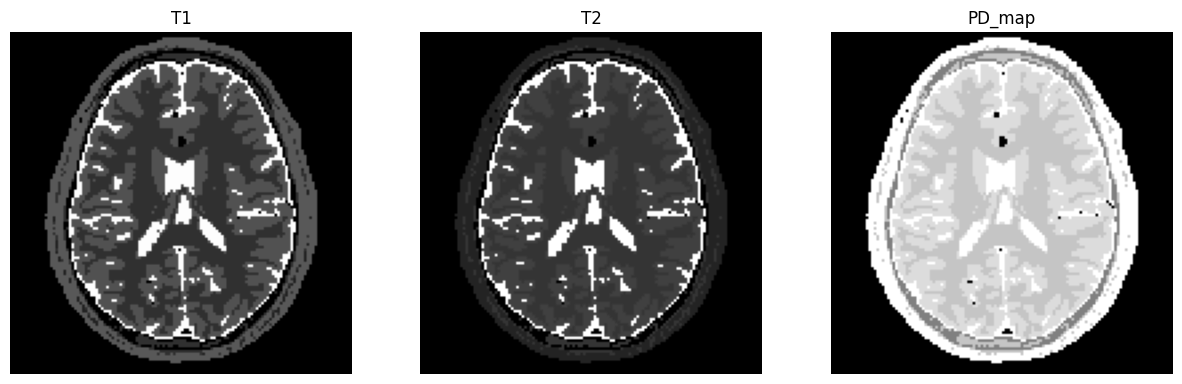

In [19]:
# Your code here ... 
utils.imshow([T1_map, T2_map, PD_map], ['T1', 'T2', 'PD_map'])

Unique values of T1_map, T2_map, and PD_map

In [20]:
# Your code here ... 
T1_values = set(T1_map.flatten())
T2_values = set(T2_map.flatten())
PD_values = set(PD_map.flatten())
print(f"Unique values of T1_map: {T1_values}")
print(f"Unique values of T2_map: {T2_values}")
print(f"Unique values of PD_map: {PD_values}")

Unique values of T1_map: {1, 833, 900, 2596, 2569, 500, 350}
Unique values of T2_map: {1, 70, 329, 47, 83}
Unique values of PD_map: {0.0, 1.0, 0.7700000000000029, 0.5, 0.7700000000000011, 0.8599999999999961, 0.7699999999999846}


CSF

In [21]:
# Your code here ... 
CSF_idx = np.argwhere(CSF)
T1_CSF = T1_map[CSF_idx[0, 0], CSF_idx[0, 1]]
T2_CSF = T2_map[CSF_idx[0, 0], CSF_idx[0, 1]]
PD_CSF = PD_map[CSF_idx[0, 0], CSF_idx[0, 1]]
print(f"T1 CSF = {T1_CSF} ms")
print(f"T2 CSF = {T2_CSF} ms")
print(f"PD CSF = {PD_CSF}")


T1 CSF = 2569 ms
T2 CSF = 329 ms
PD CSF = 1.0


GM

In [22]:
# Your code here ... 
GM_idx = np.argwhere(GM)
T1_GM = T1_map[GM_idx[0, 0], GM_idx[0, 1]]
T2_GM = T2_map[GM_idx[0, 0], GM_idx[0, 1]]
PD_GM = PD_map[GM_idx[0, 0], GM_idx[0, 1]]
print(f"T1 GM = {T1_GM} ms")
print(f"T2 GM = {T2_GM} ms")
print(f"PD GM = {PD_GM}")

T1 GM = 833 ms
T2 GM = 83 ms
PD GM = 0.8599999999999961


WM (In this case, we get all values of segment and average them The results are the same as we've done above)

In [23]:
# Your code here ... 
T1_WM = np.mean(np.extract(WM, T1_map))
T2_WM = np.mean(np.extract(WM, T2_map))
PD_WM = np.mean(np.extract(WM, PD_map))
print(f"T1 WM = {T1_WM} ms")
print(f"T2 WM = {T2_WM} ms")
print(f"PD WM = {PD_WM}")

T1 WM = 500.0 ms
T2 WM = 70.0 ms
PD WM = 0.7699999999999846


## Simulate MR Image Contrast from Pulse Sequences

### 2. Spin Echo Proton Density Weighted (PDw):

#### 2.1.1 Excitation and Refocusing Pulses
- Assume a 90º excitation pulse.
- Assume a 180º refocusing pulse.

#### 2.1.2 Signal Equation
- Use the Spin-Echo signal equation from Bernstein equation 14.57.

In [33]:
# Your code here ... 
spin_echo = lambda TR, TE: PD_map*(1 - 2*np.exp(-(TR-TE/2)/T1_map) + np.exp(-TR/T1_map))*np.exp(-TE/T2_map)


#### 2.1.3 Selection of TR and TE
- Choose the Repetition Time (TR) and Echo Time (TE) accordingly.
- Consider the T1 and T2 values of Gray Matter (GM) and White Matter (WM) when determining TR and TE.


In [34]:
# Your code here ... 
# PDw has low TE and high TR
TR_PD = 7000
TE_PD = 5
PDw = spin_echo(TR_PD, TE_PD)

#### 2.1.4 Spin Echo T1 Weighted:
- Use the same signal equation as for PDw.
- Adjust TR and TE accordingly for T1 weighting.

In [35]:
# Your code here ... 
# T1w has low TE and TR
# if TR and TE too small, the image looks very bright
TR_T1 = 500
TE_T1 = 15
T1w = spin_echo(TR_T1, TE_T1)

#### 2.1.5 Spin Echo T2 Weighted:
- Use the same signal equation as for PDw.
- Adjust TR and TE accordingly for T2 weighting.


In [36]:
# Your code here ... 
# T2w has both high TE and TR
# increasing both TR and TE(1000) will result in an image like CSF
TR_T2 = 6000
TE_T2 = 80
T2w = spin_echo(TR_T2, TE_T2)

#### Plot PDw, T1w, and T2w images


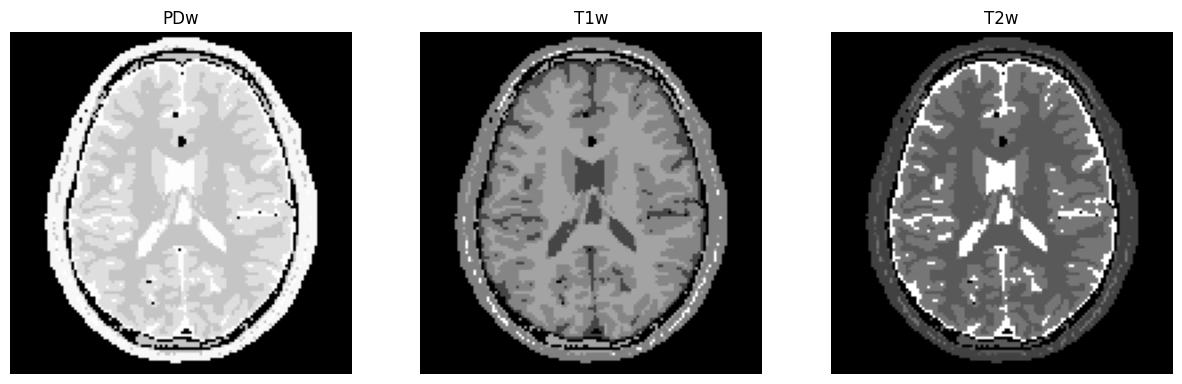

In [37]:
# Your code here ... 
utils.imshow([PDw, T1w, T2w], ['PDw', 'T1w', 'T2w'])